## CRM - Sales


In [2]:
#importing required libraries
import gdown
import zipfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_id = '19bfUYxH9j4Ogh0Yi3NXdomGql11Le3Tu'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.zip'

gdown.download(url, output, quiet=False)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset_folder')  # This will create a folder 'dataset_folder' with extracted files

# getting dataset directly from google drive

Downloading...
From: https://drive.google.com/uc?id=19bfUYxH9j4Ogh0Yi3NXdomGql11Le3Tu
To: C:\Users\harpr\OneDrive\Desktop\Construct Folder 2\dataset.zip
100%|████████████████████████████████████████████████████████████████████████████████| 139k/139k [00:00<00:00, 830kB/s]


In [4]:
print("Extracted files:", os.listdir('dataset_folder'))

Extracted files: ['accounts.csv', 'data_dictionary.csv', 'products.csv', 'sales_pipeline.csv', 'sales_teams.csv']


In [5]:
folder_path = 'dataset_folder'
#creating dataframe for further processing

data_dictionary_df = pd.read_csv(os.path.join(folder_path, 'data_dictionary.csv'))
accounts_df = pd.read_csv(os.path.join(folder_path, 'accounts.csv'))
products_df = pd.read_csv(os.path.join(folder_path, 'products.csv'))
sales_pipeline_df = pd.read_csv(os.path.join(folder_path, 'sales_pipeline.csv'))
sales_teams_df = pd.read_csv(os.path.join(folder_path, 'sales_teams.csv'))


## Disctionary (reference table)

In [6]:
data_dictionary_df # description table 

,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees
5,accounts,office_location,Headquarters
6,accounts,subsidiary_of,Parent company
7,products,product,Product name
8,products,series,Product series
9,products,sales_price,Suggested retail price


## ACCOUNTS

In [7]:
accounts_df.head(10)   #customers 

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN
5,Blackzim,retail,2009,497.11,1588,United States,NaN
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
7,Bubba Gump,software,2002,987.39,2253,United States,NaN
8,Cancity,retail,2001,718.62,2448,United States,NaN
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic


In [8]:
accounts_df['subsidiary_of'].unique()

array([nan, 'Acme Corporation', 'Massive Dynamic', 'Bubba Gump', 'Inity',
       'Sonron', 'Golddex', 'Warephase'], dtype=object)

In [9]:
accounts_df.describe()

,year_established,revenue,employees
count,85.000000,85.000000,85.000000
mean,1996.105882,1994.632941,4660.823529
std,8.865427,2169.491436,5715.601198
min,1979.000000,4.540000,9.000000
25%,1989.000000,497.110000,1179.000000
50%,1996.000000,1223.720000,2769.000000
75%,2002.000000,2741.370000,5595.000000
max,2017.000000,11698.030000,34288.000000


In [10]:
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [11]:
accounts_df.isnull().sum()

account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [12]:
# as out of 85 rows 70 rows have null values in subsidiary 
# so it will not contribute so much 
#we can drop that column

In [13]:
accounts_df.drop(columns=['subsidiary_of'], inplace=True)

In [14]:
accounts_df.head(10)

,account,sector,year_established,revenue,employees,office_location
0,Acme Corporation,technolgy,1996,1100.04,2822,United States
1,Betasoloin,medical,1999,251.41,495,United States
2,Betatech,medical,1986,647.18,1185,Kenya
3,Bioholding,medical,2012,587.34,1356,Philipines
4,Bioplex,medical,1991,326.82,1016,United States
5,Blackzim,retail,2009,497.11,1588,United States
6,Bluth Company,technolgy,1993,1242.32,3027,United States
7,Bubba Gump,software,2002,987.39,2253,United States
8,Cancity,retail,2001,718.62,2448,United States
9,Cheers,entertainment,1993,4269.90,6472,United States


In [15]:
accounts_df['sector'].unique()

array(['technolgy', 'medical', 'retail', 'software', 'entertainment',
       'marketing', 'telecommunications', 'finance', 'employment',
       'services'], dtype=object)

In [16]:
# Replaceing "technolgy" with "technology" in the 'sector' column
accounts_df['sector'] = accounts_df['sector'].replace('technolgy', 'technology')

accounts_df

,account,sector,year_established,revenue,employees,office_location
0,Acme Corporation,technology,1996,1100.04,2822,United States
1,Betasoloin,medical,1999,251.41,495,United States
2,Betatech,medical,1986,647.18,1185,Kenya
3,Bioholding,medical,2012,587.34,1356,Philipines
4,Bioplex,medical,1991,326.82,1016,United States
...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States
81,Zencorporation,technology,2011,40.79,142,China
82,Zoomit,entertainment,1992,324.19,978,United States
83,Zotware,software,1979,4478.47,13809,United States


## Seles pipeline

In [17]:
sales_pipeline_df.head(10)   #tracks the progress of sales opportunities

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN


In [18]:
sales_pipeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [19]:
sales_pipeline_df.describe()

,close_value
count,6711.000000
mean,1490.915512
std,2320.670773
min,0.000000
25%,0.000000
50%,472.000000
75%,3225.000000
max,30288.000000


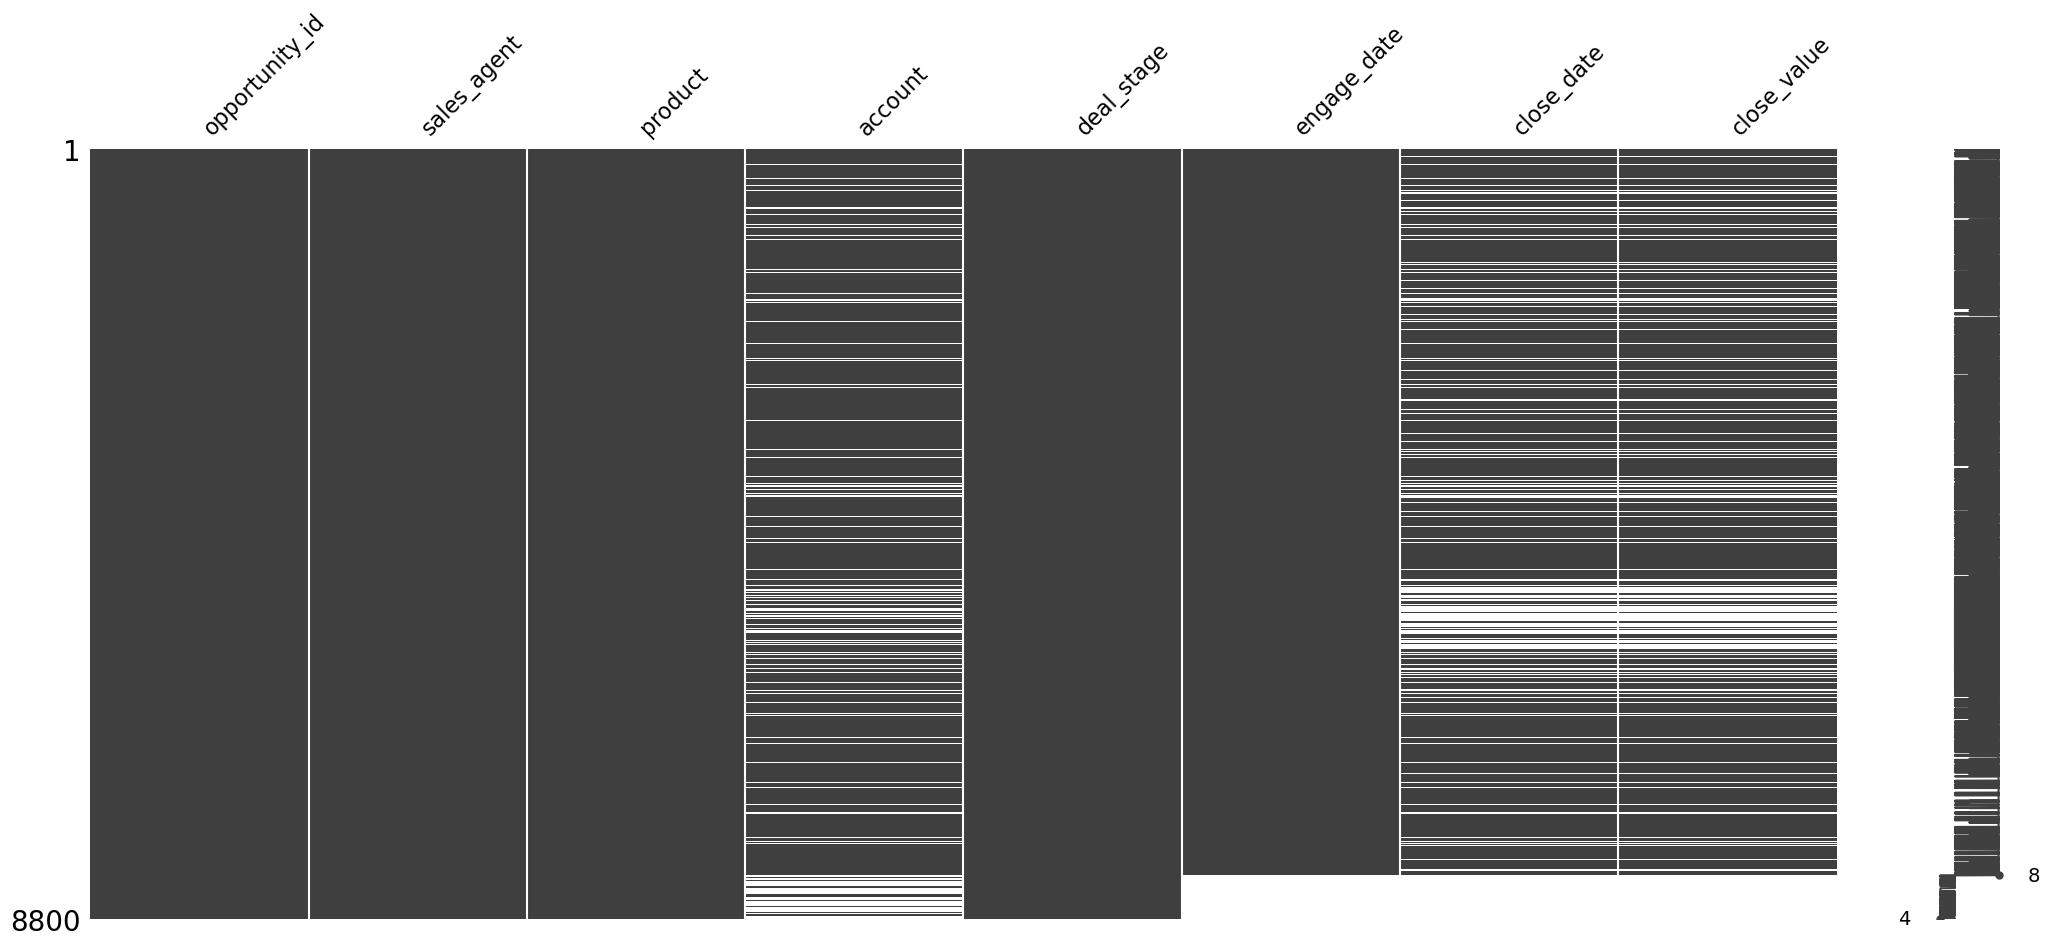

In [20]:
# Visualize missing values in a matrix form
msno.matrix(sales_pipeline_df)
plt.show()


In [20]:
# Droping rows where 'closed_dates' column has null values
sales_pipeline_df =sales_pipeline_df.dropna(subset=['close_date'])


In [21]:
# Converting engage_date and close_date to datetime format
sales_pipeline_df['engage_date'] = pd.to_datetime(sales_pipeline_df['engage_date'], errors='coerce')
sales_pipeline_df['close_date'] = pd.to_datetime(sales_pipeline_df['close_date'], errors='coerce')


In [22]:
sales_pipeline_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6711 entries, 0 to 8299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  6711 non-null   object        
 1   sales_agent     6711 non-null   object        
 2   product         6711 non-null   object        
 3   account         6711 non-null   object        
 4   deal_stage      6711 non-null   object        
 5   engage_date     6711 non-null   datetime64[ns]
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     6711 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 471.9+ KB


## Sales Teams

In [23]:
sales_teams_df.head(10)

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central
5,Jonathan Berthelot,Melvin Marxen,Central
6,Marty Freudenburg,Melvin Marxen,Central
7,Gladys Colclough,Melvin Marxen,Central
8,Niesha Huffines,Melvin Marxen,Central
9,Darcel Schlecht,Melvin Marxen,Central


In [24]:
sales_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 972.0+ bytes


In [25]:
sales_teams_df.describe()

,sales_agent,manager,regional_office
count,35,35,35
unique,35,6,3
top,Anna Snelling,Melvin Marxen,East
freq,1,6,12


In [26]:
sales_teams_df.isnull().sum()

sales_agent        0
manager            0
regional_office    0
dtype: int64

## Products


In [27]:
products_df.head(10)

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482
5,GTX Plus Basic,GTX,1096
6,GTK 500,GTK,26768


In [28]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [29]:
products_df.describe()

,sales_price
count,7.000000
mean,6023.571429
std,9388.428070
min,55.000000
25%,823.000000
50%,3393.000000
75%,5151.500000
max,26768.000000


In [30]:
products_df.isnull().sum()

product        0
series         0
sales_price    0
dtype: int64

## cleaned and processed data

In [31]:
import os

# Define the output directory where cleaned data will be saved
output_dir = 'data/cleaned_data'
os.makedirs(output_dir, exist_ok=True)

# Save each cleaned DataFrame to a separate CSV file
accounts_output_path = os.path.join(output_dir, 'cleaned_accounts.csv')
accounts_df.to_csv(accounts_output_path, index=False)
print("Accounts Data saved successfully!")

products_output_path = os.path.join(output_dir, 'cleaned_products.csv')
products_df.to_csv(products_output_path, index=False)
print("Products Data saved successfully!")

sales_pipeline_output_path = os.path.join(output_dir, 'cleaned_sales_pipeline.csv')
sales_pipeline_df.to_csv(sales_pipeline_output_path, index=False)
print("Sales Pipeline Data saved successfully!")

sales_team_output_path = os.path.join(output_dir, 'cleaned_sales_team.csv')
sales_teams_df.to_csv(sales_team_output_path, index=False)
print("Sales Team Data saved successfully!")


Accounts Data saved successfully!
Products Data saved successfully!
Sales Pipeline Data saved successfully!
Sales Team Data saved successfully!
